**Домашнее задание**

1.Сгенерировать датасет при помощи sklearn.datasets.make_regression и обучить линейную модель при помощи градиентного спуска и стохастического градиентного спуска. Построить графики среднеквадратичной ошибки (MSE) от числа итераций для обоих методов на одном рисунке, сделать выводы о разнице скорости сходимости каждого из методов.

In [171]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import datasets
from mpl_toolkits.mplot3d.axes3d import Axes3D

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [172]:
# сгенерируем набор данных
X, Y, coef = datasets.make_regression(n_samples=10000, n_features=2, n_informative=2, n_targets=1, 
                                      noise=5, coef=True, random_state=2)
X[:, 0] *= 20       # Добавим шума в первый признак
display(X, Y, coef)

array([[-5.50323538e+00,  3.88051923e-01],
       [-1.47986374e+01,  6.41540019e-01],
       [ 3.46519912e+01,  1.38746003e+00],
       ...,
       [ 1.99138148e+00,  1.14050425e+00],
       [ 1.14564205e+01, -1.62061166e-03],
       [-1.62195036e+01, -7.90286210e-01]])

array([-14.05893282, -38.97475249,  86.53592019, ...,  10.32003217,
        29.28329989, -35.99295458])

array([47.46102593,  1.66486956])

In [173]:
X.shape

(10000, 2)

In [174]:
Y.shape

(10000,)

Визуализируем то, что сгенерировали

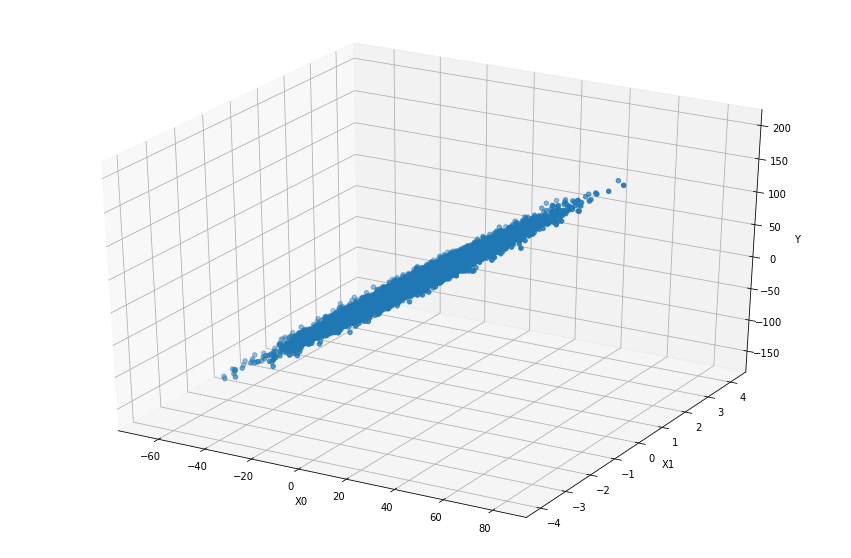

In [175]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:, 0], X[:, 1], Y)

ax.set_xlabel('X0')
ax.set_ylabel('X1')
ax.set_zlabel('Y')
plt.show()

In [176]:
def standard_scale(X):
    mean = X.mean()
    std = X.std()
    return (X - mean) / std

In [177]:
X_st = X.copy().astype(np.float64)

for i in range(X.shape[1]):
  X_st[:, i] = standard_scale(X_st[:, i])
X_st

array([[-2.77754356e-01,  3.85504659e-01],
       [-7.44773351e-01,  6.35711699e-01],
       [ 1.73972197e+00,  1.37197680e+00],
       ...,
       [ 9.87897050e-02,  1.12821753e+00],
       [ 5.74331592e-01,  8.75901031e-04],
       [-8.16160421e-01, -7.77581502e-01]])

In [178]:
# def min_max_scale(X):
#     return (X - X.min()) / (X.max() - X.min())

In [179]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

In [180]:
# Классический  градиентный спуск (GD)
def gradient_descent(X, y, iterations, eta=1e-4):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    errors = []
    
    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        errors.append(err)
        dQ = 2/n * X.T @ (y_pred - y) # градиент функции ошибки
        W -= (eta * dQ)
        if i % (iterations / 10) == 0:
            print(f'Iter №{i}: weights {W} error {err}')
    print(f'Final MSE: {calc_mse(y, np.dot(X, W))}')
    return W, errors

In [181]:
# Стохастический градиентный спуск (SGD)
def stohastic_gradient_descent(X, y, iterations, batch_size, eta=1e-2):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    errors = []
    
    n_batch = n // batch_size    
    if n % batch_size != 0:
        n_batch += 1
    print(f'Amount of batches is {n_batch}')
        
    for i in range(0, iterations):
        
        for b in range(n_batch):
            inds = np.random.randint(n, size=batch_size)

            X_tmp = X[inds, ]
            y_tmp = np.array(y)[inds]

            
            y_pred_tmp = np.dot(X_tmp, W)
            dQ = 2/len(y_tmp) * X_tmp.T @ (y_pred_tmp - y_tmp) # градиент функции ошибки
            W -= (eta * dQ)
            
            err = calc_mse(y, np.dot(X, W))
        
        if i % (iterations / 10) == 0:
            print(f'Iter №{i}: weights {W}, error {err}')
        errors.append(err)
    
    print(f'Final MSE: {calc_mse(y, np.dot(X, W))}')
    return W, errors

In [182]:
%%time
W, err_gd = gradient_descent(X_st, Y, iterations=2000, eta=1e-2)

Iter №0: weights [-0.32459282  1.22045538] error 2382.919059858565
Iter №200: weights [46.41526272  1.69207176] error 25.905773734178236
Iter №400: weights [47.23803902  1.65657909] error 25.17501590976438
Iter №600: weights [47.25256365  1.65518296] error 25.17478678326768
Iter №800: weights [47.25282078  1.65514475] error 25.17478671063406
Iter №1000: weights [47.25282534  1.65514384] error 25.174786710610793
Iter №1200: weights [47.25282542  1.65514382] error 25.17478671061079
Iter №1400: weights [47.25282543  1.65514382] error 25.17478671061079
Iter №1600: weights [47.25282543  1.65514382] error 25.17478671061079
Iter №1800: weights [47.25282543  1.65514382] error 25.174786710610785
Final MSE: 25.174786710610785
CPU times: user 291 ms, sys: 194 ms, total: 485 ms
Wall time: 297 ms


In [183]:
%%time
_, err_sgd = stohastic_gradient_descent(X_st, Y, iterations=2000, batch_size=1800, eta=1e-2)

Amount of batches is 6
Iter №0: weights [4.33109534 0.52319783], error 1869.9988287184312
Iter №200: weights [47.25207245  1.65474996], error 25.174787440448913
Iter №400: weights [47.23261972  1.64092552], error 25.17540463797644
Iter №600: weights [47.26981246  1.64414787], error 25.175191306653954
Iter №800: weights [47.25641349  1.66447017], error 25.1748874388545
Iter №1000: weights [47.24512446  1.65654617], error 25.174847700267065
Iter №1200: weights [47.25787071  1.65454213], error 25.174812448342582
Iter №1400: weights [47.25295544  1.64126579], error 25.174979280272552
Iter №1600: weights [47.27125786  1.65241038], error 25.175132622292516
Iter №1800: weights [47.24987694  1.68202292], error 25.175515822245426
Final MSE: 25.174906913921216
CPU times: user 3.4 s, sys: 3.05 s, total: 6.45 s
Wall time: 4.05 s


In [184]:
# len(err_gd)

In [185]:
# len(err_sgd)

Text(0, 0.5, 'MSE')

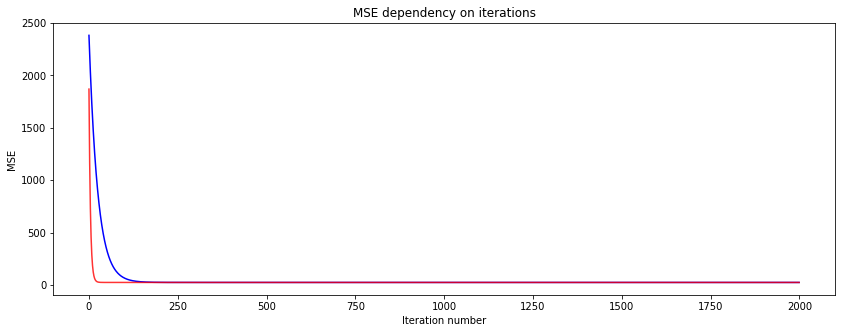

In [186]:
# Визуализируем изменение функционала ошибки для каждого метода
plt.figure(figsize=(14, 5))
plt.plot(range(len(err_gd)), err_gd, color='b') #, alpha=0.8)
plt.plot(range(len(err_sgd)), err_sgd, color='r', alpha=0.8)
plt.title('MSE dependency on iterations')
plt.xlabel('Iteration number')
plt.ylabel('MSE')

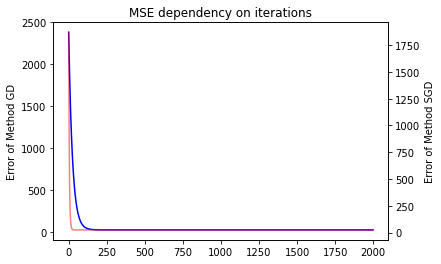

In [191]:
# Визуализируем изменение функционала ошибки для каждого метода с учётом масштаба по шкале ошибок
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(range(len(err_gd)), err_gd, color='b') #, alpha=0.5)
ax2.plot(range(len(err_sgd)), err_sgd, color='r', alpha=0.5)
plt.title('MSE dependency on iterations')
# plt.xlabel('Iteration number')
ax1.set_ylabel("Error of Method GD")
ax2.set_ylabel('Error of Method SGD')
plt.show()

Text(0, 0.5, 'MSE')

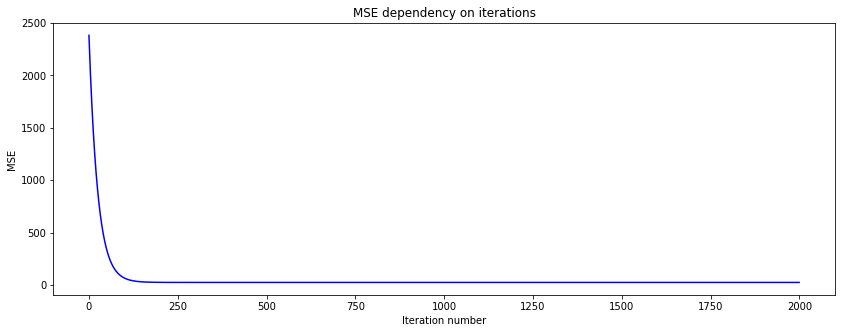

In [188]:
# Визуализируем изменение функционала ошибки отдельно для GD
plt.figure(figsize=(14, 5))
plt.plot(range(len(err_gd)), err_gd, color='b')
plt.title('MSE dependency on iterations')
plt.xlabel('Iteration number')
plt.ylabel('MSE')

Text(0, 0.5, 'MSE')

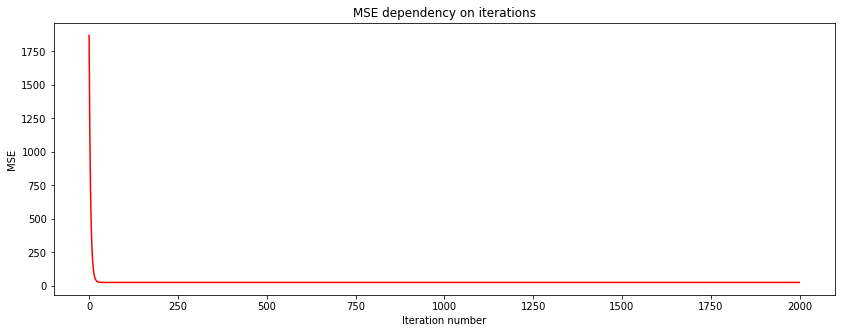

In [189]:
# Визуализируем изменение функционала ошибки отдельно для SGD
plt.figure(figsize=(14, 5))
plt.plot(range(len(err_sgd)), err_sgd, color='r')
plt.title('MSE dependency on iterations')
plt.xlabel('Iteration number')
plt.ylabel('MSE')